coral-app.py is a Flask app which exposes a tensorflow model as an endpoint. To run the app and expose over a network: 

 $ python3 coral-app.py

Then use curl to query:

In [39]:
!curl -X POST -F image=@images/test-image3.jpg 'http://localhost:5000/v1/vision/detection'

{"predictions":[{"confidence":0.98828125,"label":"person","x_max":601,"x_min":447,"y_max":522,"y_min":103},{"confidence":0.953125,"label":"person","x_max":443,"x_min":294,"y_max":534,"y_min":91},{"confidence":0.26953125,"label":"horse","x_max":795,"x_min":631,"y_max":542,"y_min":356},{"confidence":0.06640625,"label":"cow","x_max":790,"x_min":749,"y_max":421,"y_min":380}],"success":true}


Alternatively we can use requests

In [40]:
!ls images/

face.jpg  my_setup.png	people_car.jpg	test-image3.jpg


In [1]:
import requests
IP = "192.168.1.107"
PREDICT_URL = f'http://{IP}:5000/v1/vision/detection'
IMAGE_PATH = "images/test-image3.jpg"
IMAGE_PATH = "images/people_car.jpg"
#IMAGE_PATH = "images/face.jpg"

# load the input image and construct the payload for the request
image = open(IMAGE_PATH, "rb").read()
payload = {"image": image}

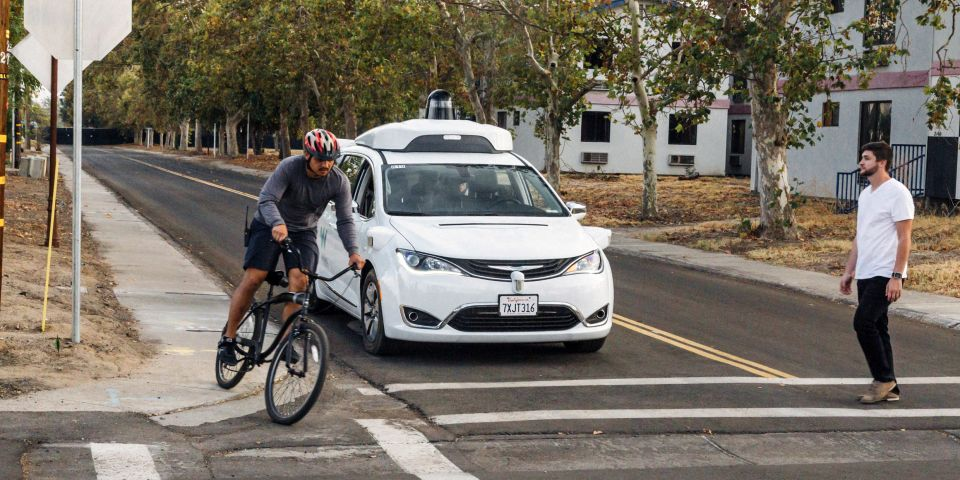

In [2]:
from IPython.display import Image
Image(IMAGE_PATH)

In [4]:
%%time
# submit the request
response = requests.post(PREDICT_URL, files=payload)

CPU times: user 4.02 ms, sys: 2.29 ms, total: 6.32 ms
Wall time: 149 ms


In [5]:
response.status_code

200

In [8]:
predictions = response.json()['predictions']

predictions

[{'confidence': 0.953125,
  'label': 'person',
  'x_max': 918,
  'x_min': 838,
  'y_max': 407,
  'y_min': 135},
 {'confidence': 0.91015625,
  'label': 'car',
  'x_max': 613,
  'x_min': 302,
  'y_max': 361,
  'y_min': 115},
 {'confidence': 0.58203125,
  'label': 'person',
  'x_max': 350,
  'x_min': 226,
  'y_max': 374,
  'y_min': 143},
 {'confidence': 0.26953125,
  'label': 'bicycle',
  'x_max': 346,
  'x_min': 215,
  'y_max': 419,
  'y_min': 212},
 {'confidence': 0.2109375,
  'label': 'person',
  'x_max': 454,
  'x_min': 422,
  'y_max': 210,
  'y_min': 171},
 {'confidence': 0.2109375,
  'label': 'person',
  'x_max': 389,
  'x_min': 359,
  'y_max': 204,
  'y_min': 161},
 {'confidence': 0.2109375,
  'label': 'person',
  'x_max': 346,
  'x_min': 305,
  'y_max': 211,
  'y_min': 147},
 {'confidence': 0.2109375,
  'label': 'traffic light',
  'x_max': 21,
  'x_min': 5,
  'y_max': 45,
  'y_min': 9},
 {'confidence': 0.16015625,
  'label': 'bicycle',
  'x_max': 324,
  'x_min': 239,
  'y_max': 40

In [9]:
len(predictions)

10

## Process response

In [10]:
import helpers
CONFIDENCE = 0.50 # A threshold percentage for confidence

In [11]:
# ensure the request was successful
if response.status_code == 200:    
    # loop over the predictions and display them
    for result in predictions:
        print("{}: {}".format(result["label"], result["confidence"]))

person: 0.953125
car: 0.91015625
person: 0.58203125
bicycle: 0.26953125
person: 0.2109375
person: 0.2109375
person: 0.2109375
traffic light: 0.2109375
bicycle: 0.16015625
person: 0.16015625


In [12]:
helpers.get_object_classes(predictions, CONFIDENCE)

{'car', 'person'}

In [13]:
helpers.get_object_instances(predictions, 'person', CONFIDENCE)

2

In [14]:
helpers.get_objects_summary(predictions, CONFIDENCE)

{'car': 1, 'person': 2}

## Draw bounding boxes

In [15]:
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

In [16]:
image = Image.open(IMAGE_PATH)  # PIL img object.
draw = ImageDraw.Draw(image)

In [17]:
image_width = image.size[0]
image_width

960

In [18]:
image_height = image.size[1]
image_height

480

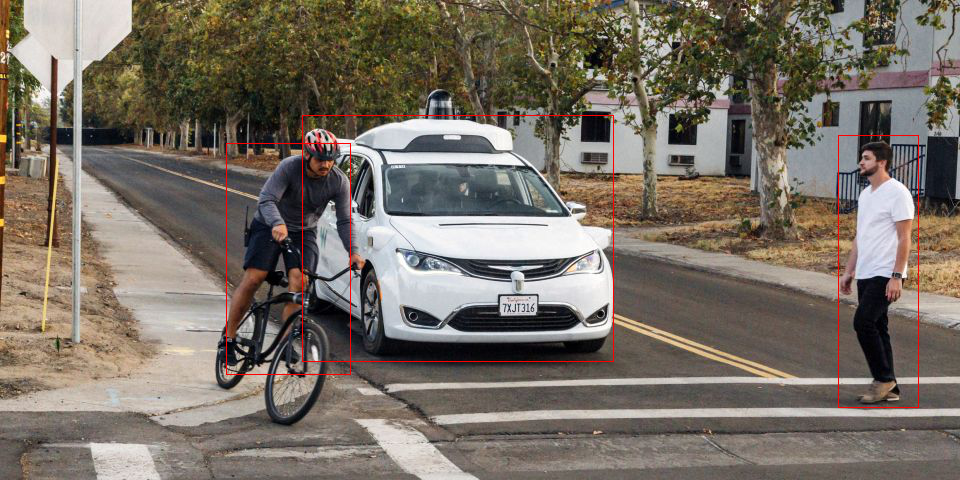

In [19]:
for predicton in predictions:
    if float(predicton["confidence"]) > CONFIDENCE:
        bounding_box = [predicton['x_min'], predicton['y_min'], predicton['x_max'], predicton['y_max']]
        draw.rectangle(bounding_box, outline='red')
        
display(image)